In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [3]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


## 1) Data Exploration

### 1.1) Checking for null values

In [4]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

### 1.2) Exploring data deatails for analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [6]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


In [7]:
len(df)

1205

In [8]:
df.shape

(1205, 14)

In [9]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1200     True
1201     True
1202     True
1203     True
1204     True
Length: 1205, dtype: bool

In [11]:
df['Adaptivity Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

### 1.3) Visualising data to identify patterns and relationship

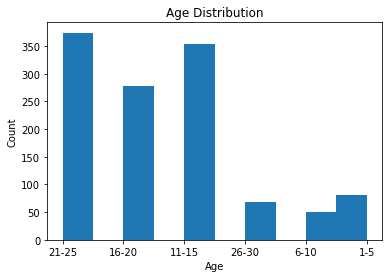

In [12]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

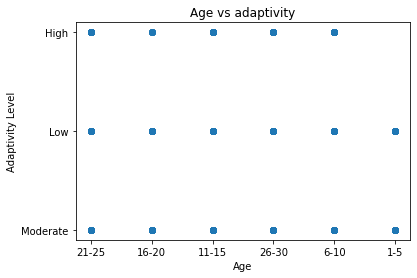

In [13]:
plt.scatter(df['Age'], df['Adaptivity Level'] )
plt.xlabel('Age')
plt.ylabel('Adaptivity Level')
plt.title('Age vs adaptivity')
plt.show()

## 2) Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

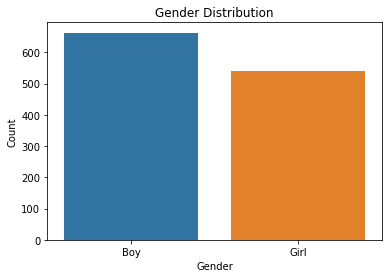

In [14]:
sns.countplot(data=df , x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show

<AxesSubplot:xlabel='Education Level', ylabel='Adaptivity Level'>

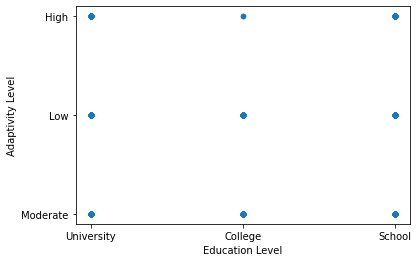

In [15]:
df.plot(kind='scatter' , x='Education Level', y='Adaptivity Level', alpha=0.8)

<function matplotlib.pyplot.show(close=None, block=None)>

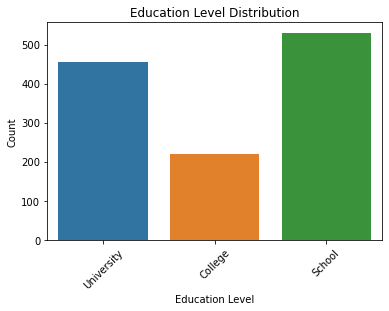

In [16]:
sns.countplot(data=df , x='Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

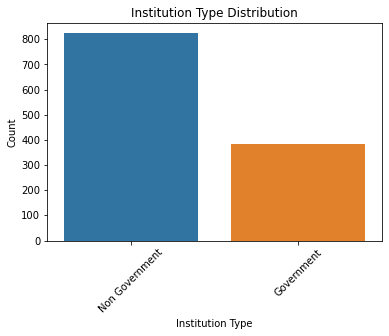

In [17]:
sns.countplot(data=df , x='Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Count')
plt.title('Institution Type Distribution')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

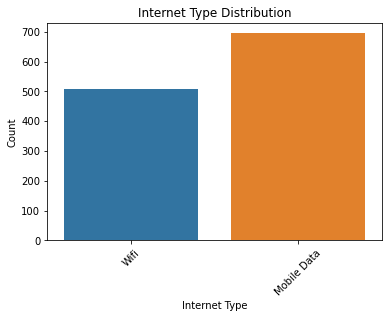

In [18]:
sns.countplot(data=df , x='Internet Type')
plt.xlabel('Internet Type')
plt.ylabel('Count')
plt.title('Internet Type Distribution')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

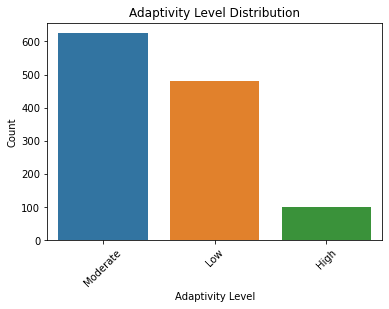

In [19]:
sns.countplot(data=df , x='Adaptivity Level')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.title('Adaptivity Level Distribution')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

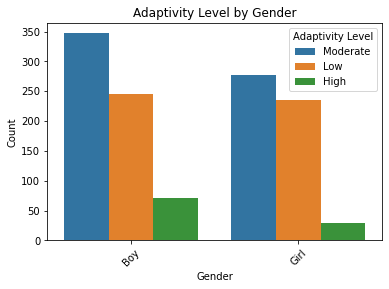

In [20]:
sns.countplot(data=df, x='Gender' , hue='Adaptivity Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Adaptivity Level by Gender')
plt.xticks(rotation=45)
plt.show

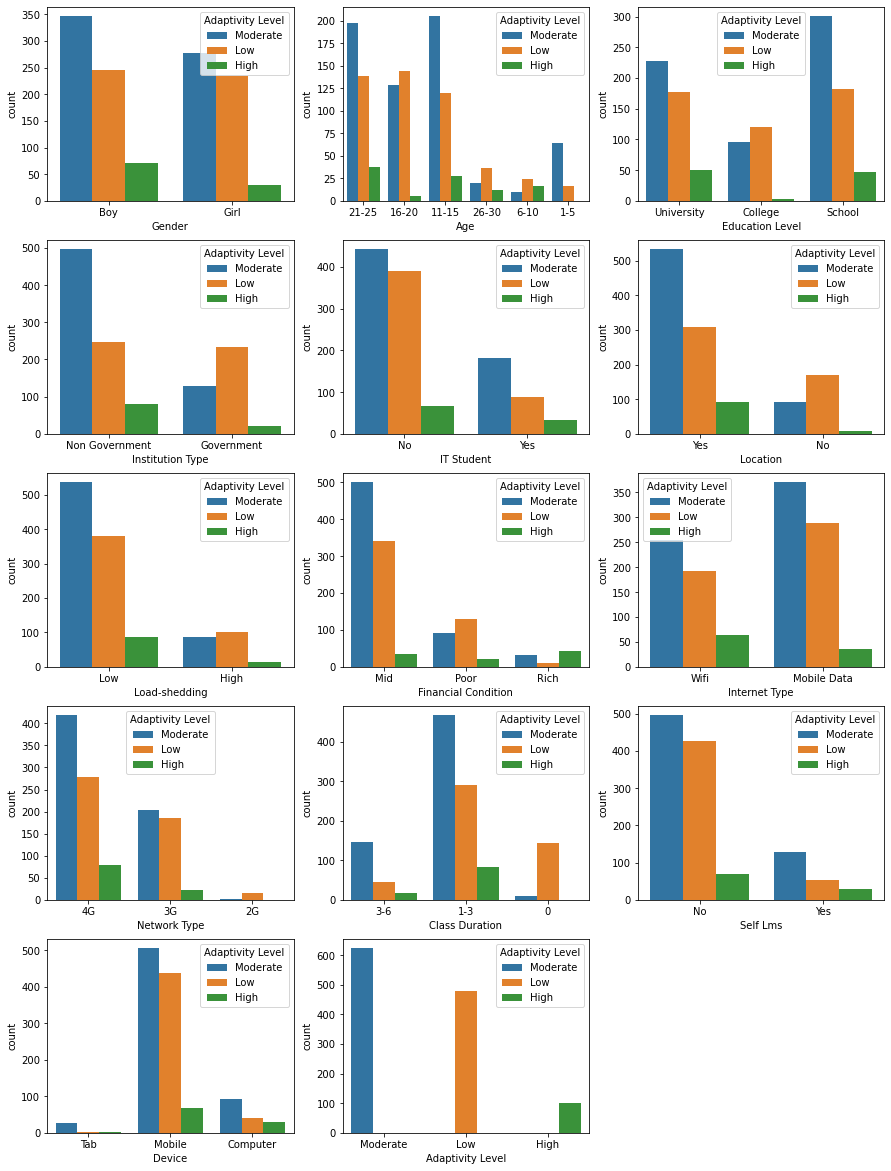

In [21]:
i = 1
plt.figure(figsize = (15,25))      # Visualizing target variable
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = df)
    i +=1

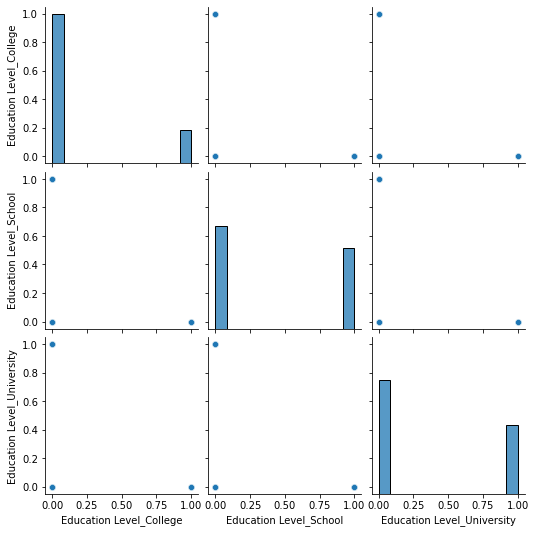

In [22]:
num_col = ['Age' , 'Class Duration']
catog_col = ['Education Level']
enc_col = pd.get_dummies(df[catog_col] , prefix = catog_col)
subset = pd.concat([df[num_col], enc_col , df['Adaptivity Level']] , axis=1)
sns.pairplot(subset)
plt.show()

## 3) Data Transformation

In [23]:
def Label_Encoding(c1):
    from sklearn import preprocessing
    label_encoder=preprocessing.LabelEncoder()
    df[c1]=label_encoder.fit_transform(df[c1])
    df[c1].unique()

In [24]:
Label_Encoding('Gender')
Label_Encoding('Education Level')
Label_Encoding('Institution Type')
Label_Encoding('IT Student')
Label_Encoding('Location')
Label_Encoding('Load-shedding')
Label_Encoding('Financial Condition')          # Coverting categorical columns to numeric using label_encoding
Label_Encoding('Internet Type')
Label_Encoding('Network Type')
Label_Encoding('Device')
Label_Encoding('Self Lms')
Label_Encoding('Adaptivity Level')
Label_Encoding('Age')
Label_Encoding('Class Duration')
df.head(2)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Adaptivity Level'] = label_encoder.fit_transform(df['Adaptivity Level'])
df_num_only = df.drop(['Adaptivity Level'] , axis = 1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data = scaler.fit_transform(df_num_only)

In [27]:
scaled_data

array([[-0.90415498,  0.72502676,  1.11241884, ...,  1.73744858,
        -0.45940753,  2.89060981],
       [ 1.10600508,  0.72502676,  1.11241884, ..., -0.08626705,
         2.17671662,  0.28538556],
       [ 1.10600508, -0.10151746, -1.65713632, ..., -0.08626705,
        -0.45940753,  0.28538556],
       ...,
       [-0.90415498, -0.92806169, -0.27235874, ..., -0.08626705,
        -0.45940753,  0.28538556],
       [ 1.10600508, -0.10151746, -1.65713632, ..., -0.08626705,
        -0.45940753,  0.28538556],
       [ 1.10600508, -0.92806169, -0.27235874, ..., -0.08626705,
        -0.45940753,  0.28538556]])

In [28]:
df_=pd.DataFrame(scaled_data, columns=df.columns[:-1])
df_.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,-0.904155,0.725027,1.112419,0.681290,-0.580864,0.537373,0.447436,-0.565091,1.167367,0.723409,1.737449,-0.459408,2.890610
1,1.106005,0.725027,1.112419,0.681290,-0.580864,0.537373,-2.234955,-0.565091,-0.856629,0.723409,-0.086267,2.176717,0.285386
2,1.106005,-0.101517,-1.657136,-1.467805,-0.580864,0.537373,0.447436,-0.565091,1.167367,0.723409,-0.086267,-0.459408,0.285386
3,1.106005,-0.928062,-0.272359,0.681290,-0.580864,0.537373,0.447436,-0.565091,-0.856629,0.723409,-0.086267,-0.459408,0.285386
4,1.106005,-0.101517,-0.272359,0.681290,-0.580864,0.537373,0.447436,1.087664,-0.856629,-1.218034,-1.909983,-0.459408,0.285386


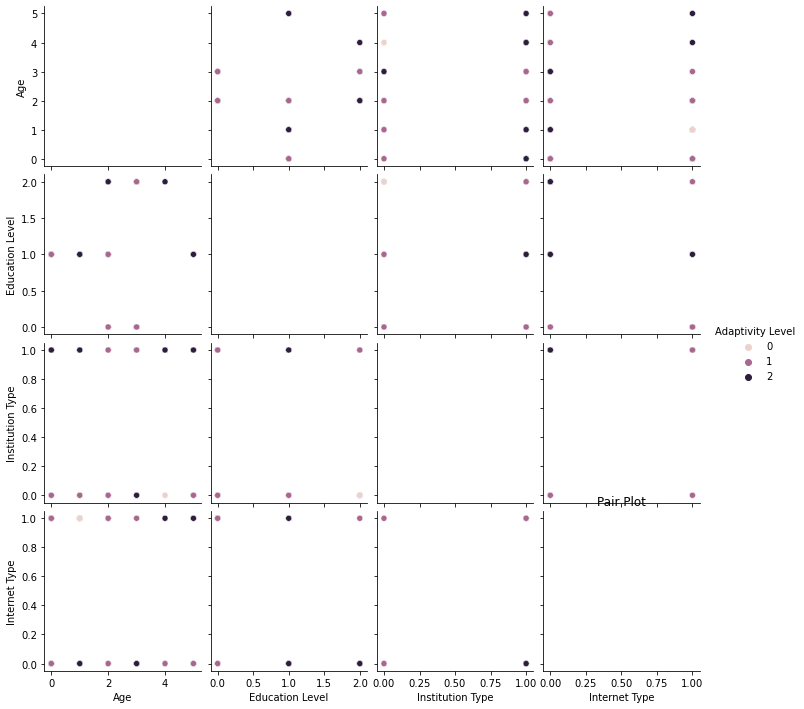

In [29]:
columns=['Age','Education Level','Institution Type', 'Internet Type','Adaptivity Level']
sns.pairplot(df[columns] , hue='Adaptivity Level',diag_kind='bar')
plt.title('Pair Plot')
plt.show()

## 4) Calculating Accuracy of Logistic Regression, KNN and SVM

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
x= df_
y=df['Adaptivity Level']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

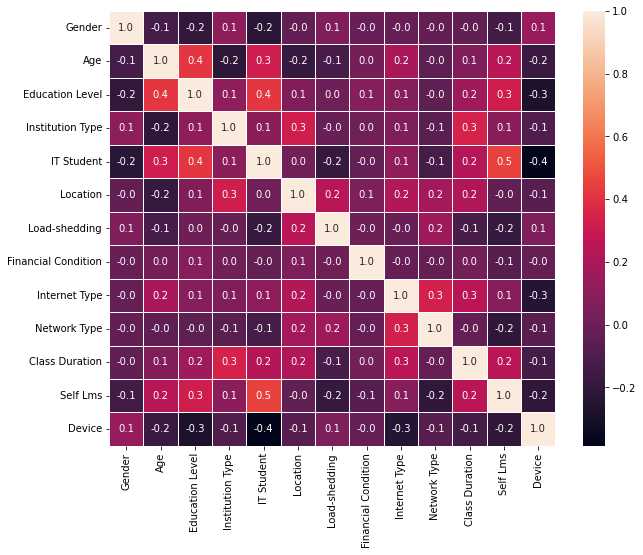

In [32]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);     # Correlation map

In [33]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()

In [34]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [35]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
svm.fit(x_train, y_train)

SVC()

In [37]:
logreg_pred = logreg.predict(x_test)
knn_pred = knn.predict(x_test)
svm_pred = svm.predict(x_test)

In [38]:
logreg_accuracy = accuracy_score(y_test, logreg_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [39]:
print(f"Logistic Regression accuracy :{logreg_accuracy}")
print(f"KNN  accuracy :{knn_accuracy}")
print(f"SVM  accuracy :{svm_accuracy}")

Logistic Regression accuracy :0.7154696132596685
KNN  accuracy :0.7817679558011049
SVM  accuracy :0.8287292817679558


## 5) ML Algorithm - SVM

In [40]:
svm.fit(x_train, y_train)

SVC()

In [41]:
y_pred=svm.predict(x_test)

In [42]:
print(confusion_matrix(y_test,y_pred))

[[  8   3  16]
 [  0 113  22]
 [  1  20 179]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.30      0.44        27
           1       0.83      0.84      0.83       135
           2       0.82      0.90      0.86       200

    accuracy                           0.83       362
   macro avg       0.85      0.68      0.71       362
weighted avg       0.83      0.83      0.82       362



In [44]:
y_pred

array([1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2,

In [45]:
svm=SVC(kernel='poly', gamma = 15 , C=7 , random_state=0)     # Using kernel poly for non linear distribution
svm.fit(x_train , y_train)

SVC(C=7, gamma=15, kernel='poly', random_state=0)

In [46]:
y_pred=svm.predict(x_test)

In [47]:
print('Accuracy score on test data : with default poly kernel')
print(accuracy_score(y_test,y_pred))

Accuracy score on test data : with default poly kernel
0.8922651933701657


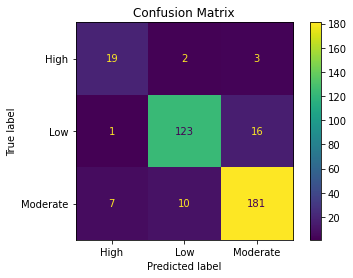

In [48]:
cm = confusion_matrix(svm.predict(x_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()